**Reference: Sampling and scrambling on a chain of superconducting qubits**

Here we provide additional details about the Josephson sampler. 
In (2), Y and Z are Pauli matrices. The circuit is a function of x ∈ R m, with each component 4π-periodic. The design attempts to embed as many rotation parameters as possible, while making sure there is no redundancy when applied to classical inputs or when layered. On the imbqx5 chip the CZ gate diag(1, 1, 1, −1) is made from a CNOT and Hadamards. Explicit L = 1 circuits for n = 5 and 6 are shown in Figs. 22 and 23, which also show the particular mapping between vector components and gate angles used.

In this work we will study the performance of a practical embedding circuit—the Josephson sampler—on the
IBM Quantum Experience ibmqx5 device, which has 16
transmon qubits. We study samplers up to size n = 6.
The circuit acts on a 1d chain of qubits with nearestneighbor CNOT or CZ gates, and has a layered construction

       U = UL · · ·U2U1 (1)
with L layers, as shown below.

First layer U1U2:
![First layer U1U2](.\\pics\\josephson_p1.jpg)

Description:
![Description](.\\pics\\josephson_p2.jpg)

Apendix A:
Explicit L = 1 circuits for n = 5 and 6 
![Apendix A](.\\pics\\josephson_p3.jpg)

In [3]:
# func to apply a Josephson sampler layer to a circuit


def josephson_sampler_layer(circ, theta, phi):
    '''
    args:
        circ - (QuantumCircuit object) circuit to apply protocol to
        theta - angle for Y rotations
        phi - angle for Z rotations
    '''
    # define layer structure
    layers = [(i, i+1) for i in range(len(circ.qubits)-2)]
    first_CZ_pairs = [layers[i] for i in range(len(layers)) if i%2==0]
    second_CZ_pairs =  [layers[i] for i in range(len(layers)) if i%2!=0]

    # 1. first u round 
    for i in range(0,len(circ.qubits)-1): 
        circ.ry(theta,i)
        circ.rz(phi,i)

    # 2. first CZ round 
    for pair in first_CZ_pairs:
        circ.cz(pair[0],pair[1])

    # 3. second u round 
    for i in range(1,len(circ.qubits)-2): 
        circ.ry(theta,i)
        circ.rz(phi,i)
        
    # 4. second CZ round
    for pair in second_CZ_pairs:
        circ.cz(pair[0],pair[1])

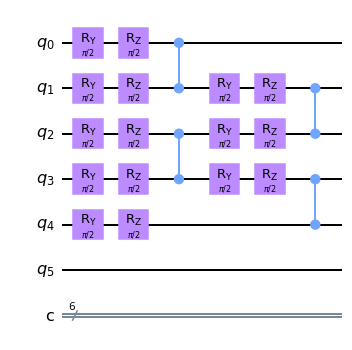

In [7]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, IBMQ
from numpy import pi


# VERIFY:

# for 6 Qubits

n = 6 

circ = QuantumCircuit(n,n)

josephson_sampler_layer(circ, theta=pi/2, phi=pi/2)

circ.draw('mpl')

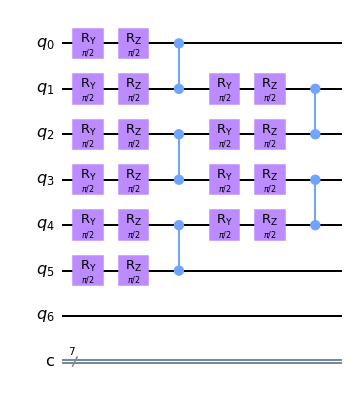

In [8]:
# for 7 Qubits

n = 7

circ = QuantumCircuit(n,n)

josephson_sampler_layer(circ, theta=pi/2, phi=pi/2)

circ.draw('mpl')